In [1]:
import MDP_function as mf
import numpy as np 
import pandas as pd

In [2]:
data_file = "MDP_Original_data.csv"
original_data = pd.read_csv(data_file)
original_data.describe()

,session,reward,Interaction,hintCount,TotalTime,TotalPSTime,TotalWETime,avgstepTime,avgstepTimePS,stepTimeDeviation,...,cumul_NextStepClickCountWE,cumul_PreviousStepClickCountWE,cumul_deletedApp,CurrPro_NumProbRule,CurrPro_avgProbTime,CurrPro_avgProbTimePS,CurrPro_avgProbTimeDeviationPS,CurrPro_avgProbTimeWE,CurrPro_avgProbTimeDeviationWE,CurrPro_medianProbTime
count,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,...,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000
mean,2.872611,-0.357487,58.481119,1.384668,310.665781,281.750120,15.641810,5.386777,5.644317,10.078205,...,7.561192,0.631711,2.752275,4.614877,277.104075,254.864549,449.835179,15.806057,28.051147,118.223665
std,2.514063,34.131956,91.295554,4.517505,469.484698,479.586795,40.340474,3.618475,2.738035,3.364813,...,4.566449,1.900646,6.480832,1.192409,169.975021,166.940629,234.578285,15.652590,25.924875,114.950773
min,1.000000,-305.714286,2.000000,0.000000,0.057000,0.000000,0.000000,0.028500,0.000000,0.059397,...,0.000000,0.000000,0.000000,2.000000,28.337368,28.337368,72.712209,0.000000,0.000000,0.126000
25%,1.000000,0.000000,11.000000,0.000000,62.407750,0.000000,0.000000,3.198388,4.572743,8.646047,...,5.000000,0.000000,0.000000,4.000000,142.084773,125.796686,260.678639,0.000000,0.000000,53.981500
50%,2.000000,0.000000,29.000000,0.000000,186.537000,150.838500,0.000000,5.432052,5.730519,10.266256,...,8.000000,0.000000,0.000000,4.000000,224.548622,184.088302,393.942286,12.346511,32.380211,81.495000
75%,4.000000,0.000000,69.000000,0.000000,318.528594,293.399736,8.323750,6.308788,5.730519,11.542239,...,10.000000,0.000000,3.000000,5.000000,375.310788,361.420962,570.055935,27.746320,48.647872,148.718000
max,19.000000,200.000000,1945.000000,86.000000,7437.672000,7437.672000,507.912000,40.045667,60.000000,27.082100,...,31.000000,27.000000,109.000000,8.000000,705.756679,705.756679,1017.360329,48.043621,85.893332,506.664000


In [3]:
original_data.columns.tolist()

['student',
 'currProb',
 'course',
 'session',
 'priorTutorAction',
 'reward',
 'Interaction',
 'hintCount',
 'TotalTime',
 'TotalPSTime',
 'TotalWETime',
 'avgstepTime',
 'avgstepTimePS',
 'stepTimeDeviation',
 'symbolicRepresentationCount',
 'englishSymbolicSwitchCount',
 'Level',
 'probDiff',
 'difficultProblemCountSolved',
 'difficultProblemCountWE',
 'easyProblemCountSolved',
 'easyProblemCountWE',
 'probAlternate',
 'easyProbAlternate',
 'RuleTypesCount',
 'UseCount',
 'PrepCount',
 'MorphCount',
 'OptionalCount',
 'NewLevel',
 'SolvedPSInLevel',
 'SeenWEinLevel',
 'probIndexinLevel',
 'probIndexPSinLevel',
 'InterfaceErrorCount',
 'RightApp',
 'WrongApp',
 'WrongSemanticsApp',
 'WrongSyntaxApp',
 'PrightAppRatio',
 'RrightAppRatio',
 'F1Score',
 'FDActionCount',
 'BDActionCount',
 'DirectProofActionCount',
 'InDirectProofActionCount',
 'actionCount',
 'UseWindowInfo',
 'NonPSelements',
 'AppCount',
 'AppRatio',
 'hintRatio',
 'BlankRatio',
 'HoverHintCount',
 'SystemInfoHintCou

In [4]:
len(original_data.columns.tolist())

130

In [5]:
original_features = original_data.loc[:, 'reward':'CurrPro_medianProbTime']
original_features.describe()

,reward,Interaction,hintCount,TotalTime,TotalPSTime,TotalWETime,avgstepTime,avgstepTimePS,stepTimeDeviation,symbolicRepresentationCount,...,cumul_NextStepClickCountWE,cumul_PreviousStepClickCountWE,cumul_deletedApp,CurrPro_NumProbRule,CurrPro_avgProbTime,CurrPro_avgProbTimePS,CurrPro_avgProbTimeDeviationPS,CurrPro_avgProbTimeWE,CurrPro_avgProbTimeDeviationWE,CurrPro_medianProbTime
count,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,...,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000
mean,-0.357487,58.481119,1.384668,310.665781,281.750120,15.641810,5.386777,5.644317,10.078205,0.954732,...,7.561192,0.631711,2.752275,4.614877,277.104075,254.864549,449.835179,15.806057,28.051147,118.223665
std,34.131956,91.295554,4.517505,469.484698,479.586795,40.340474,3.618475,2.738035,3.364813,0.236581,...,4.566449,1.900646,6.480832,1.192409,169.975021,166.940629,234.578285,15.652590,25.924875,114.950773
min,-305.714286,2.000000,0.000000,0.057000,0.000000,0.000000,0.028500,0.000000,0.059397,0.000000,...,0.000000,0.000000,0.000000,2.000000,28.337368,28.337368,72.712209,0.000000,0.000000,0.126000
25%,0.000000,11.000000,0.000000,62.407750,0.000000,0.000000,3.198388,4.572743,8.646047,1.000000,...,5.000000,0.000000,0.000000,4.000000,142.084773,125.796686,260.678639,0.000000,0.000000,53.981500
50%,0.000000,29.000000,0.000000,186.537000,150.838500,0.000000,5.432052,5.730519,10.266256,1.000000,...,8.000000,0.000000,0.000000,4.000000,224.548622,184.088302,393.942286,12.346511,32.380211,81.495000
75%,0.000000,69.000000,0.000000,318.528594,293.399736,8.323750,6.308788,5.730519,11.542239,1.000000,...,10.000000,0.000000,3.000000,5.000000,375.310788,361.420962,570.055935,27.746320,48.647872,148.718000
max,200.000000,1945.000000,86.000000,7437.672000,7437.672000,507.912000,40.045667,60.000000,27.082100,2.000000,...,31.000000,27.000000,109.000000,8.000000,705.756679,705.756679,1017.360329,48.043621,85.893332,506.664000


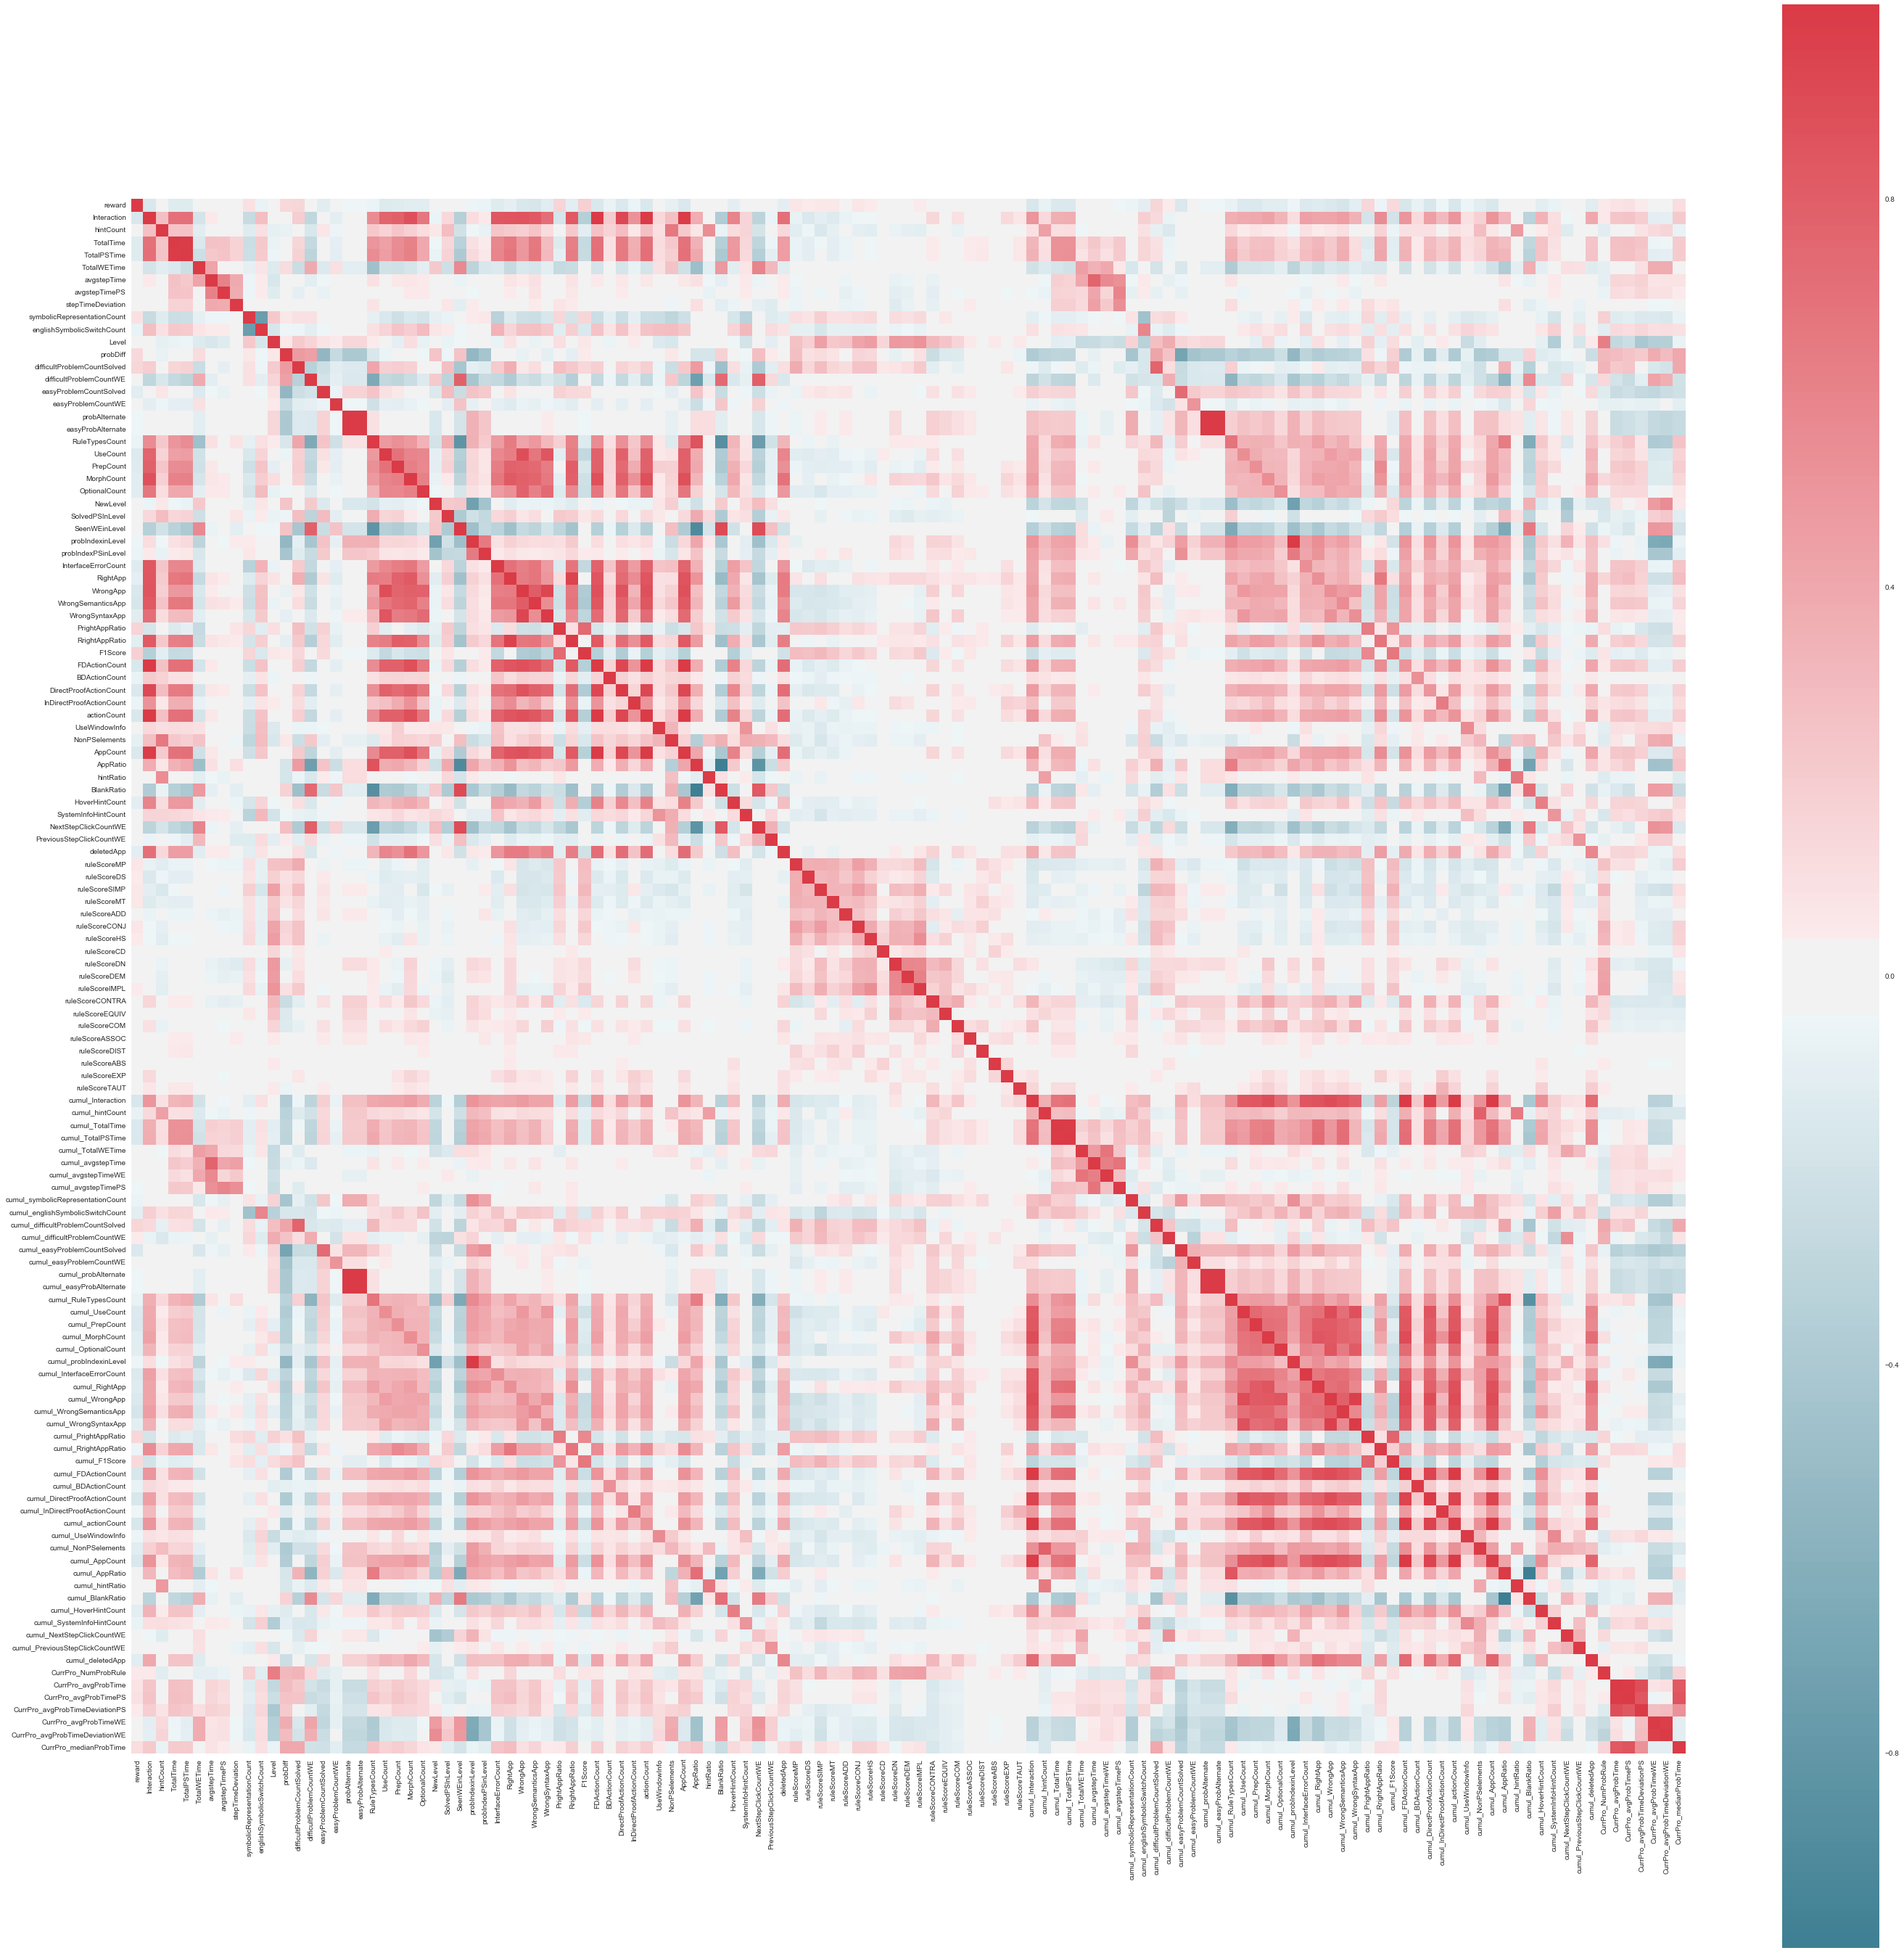

In [6]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(48, 48))
corr = original_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [7]:
result = pd.qcut(original_data['Level'], 4, labels=[0,1,2,3])
result.unique()

[0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [8]:
# select all features from the original dataset and get features names as feature space indexes
feature_data = original_data.loc[:, 'Interaction':'CurrPro_medianProbTime']
feature_space = feature_data.columns.tolist()

In [ ]:
#pd.DataFrame.hist(original_data, column=feature_space)

In [ ]:
sns.pairplot(feature_data)